# 지진발생 현황
http://www.kma.go.kr/weather/earthquake_volcano/domesticlist.jsp


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [2]:
data_path = "./data/"
eq = pd.read_csv(data_path + "eq.csv")

In [3]:
eq.head()

,번호,발생시각,규모,깊이(km),위도,경도,위치
0,1200,2017.12.30 19:44,2.0,17,35.76 N,129.17 E,경북 경주시 남남서쪽 9km 지역
1,1199,2017.12.29 17:40,2.1,10,36.11 N,129.34 E,경북 포항시 북구 북북서쪽 8km 지역
2,1198,2017.12.27 19:42,2.3,8,36.11 N,129.36 E,경북 포항시 북구 북쪽 7km 지역
3,1197,2017.12.27 19:27,2.8,8,36.11 N,129.36 E,경북 포항시 북구 북쪽 7km 지역
4,1196,2017.12.26 4:05,2.2,7,36.14 N,129.37 E,경북 포항시 북구 북쪽 11km 지역


- 위도, 경도변수를 문자 제외 후 float 형태로 변환

In [4]:
eq['위도'].str.split().str[0]

0       35.76
1       36.11
2       36.11
3       36.11
4       36.14
        ...  
1195    36.90
1196    36.50
1197    36.30
1198    35.80
1199    38.70
Name: 위도, Length: 1200, dtype: object

In [5]:
eq.dtypes

번호          int64
발생시각       object
규모        float64
깊이(km)     object
위도         object
경도         object
위치         object
dtype: object

In [6]:
eq['위도']=eq['위도'].str.split().str[0].astype('float64')

In [7]:
eq['경도']=eq['경도'].str.split().str[0].astype('float64')

In [8]:
eq.dtypes

번호          int64
발생시각       object
규모        float64
깊이(km)     object
위도        float64
경도        float64
위치         object
dtype: object

- 발생시각을 TimeStamp로 변환하여 index로 지정

In [9]:
eq['발생시각']=pd.to_datetime(eq['발생시각'])

In [10]:
eq.set_index('발생시각',inplace=True)

In [11]:
eq.head()

,번호,규모,깊이(km),위도,경도,위치
발생시각,,,,,,
2017-12-30 19:44:00,1200,2.0,17,35.76,129.17,경북 경주시 남남서쪽 9km 지역
2017-12-29 17:40:00,1199,2.1,10,36.11,129.34,경북 포항시 북구 북북서쪽 8km 지역
2017-12-27 19:42:00,1198,2.3,8,36.11,129.36,경북 포항시 북구 북쪽 7km 지역
2017-12-27 19:27:00,1197,2.8,8,36.11,129.36,경북 포항시 북구 북쪽 7km 지역
2017-12-26 04:05:00,1196,2.2,7,36.14,129.37,경북 포항시 북구 북쪽 11km 지역


- 월간 평균 지진규모와 빈도를 시각화

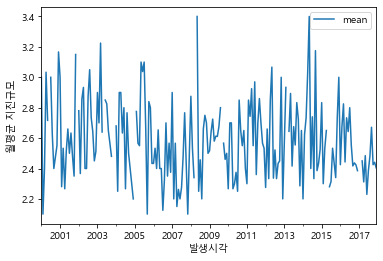

In [12]:
eq.resample('M')['규모'].agg(['mean']).plot()
plt.ylabel('월평균 지진규모')
plt.show()

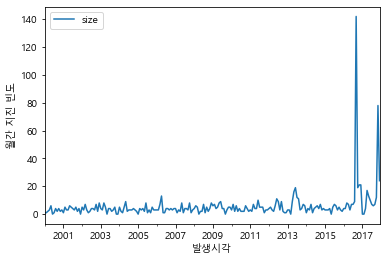

In [13]:
eq.resample('M')['규모'].agg(['size']).plot()
plt.ylabel('월간 지진 빈도')
plt.show()

- 2015년 이후 주간 지진발생 빈도를 시각화

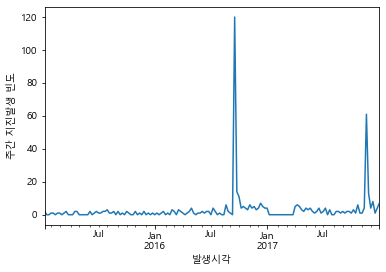

In [14]:
eq[eq.index>'2014-12-31'].resample('W')['규모'].size().plot()
plt.ylabel('주간 지진발생 빈도')
plt.show()

- 2017년의 지진발생 현황을 지도에 시각화

In [15]:
eq_2017=eq.loc['2017']

In [16]:
eq_2017

,번호,규모,깊이(km),위도,경도,위치
발생시각,,,,,,
2017-12-30 19:44:00,1200,2.0,17,35.76,129.17,경북 경주시 남남서쪽 9km 지역
2017-12-29 17:40:00,1199,2.1,10,36.11,129.34,경북 포항시 북구 북북서쪽 8km 지역
2017-12-27 19:42:00,1198,2.3,8,36.11,129.36,경북 포항시 북구 북쪽 7km 지역
2017-12-27 19:27:00,1197,2.8,8,36.11,129.36,경북 포항시 북구 북쪽 7km 지역
2017-12-26 04:05:00,1196,2.2,7,36.14,129.37,경북 포항시 북구 북쪽 11km 지역
...,...,...,...,...,...,...
2017-04-01 16:04:00,1027,2.2,-,35.78,129.20,경북 경주시 남남서쪽 7km 지역
2017-03-31 13:53:00,1026,2.5,-,35.78,129.20,경북 경주시 남남서쪽 6km 지역
2017-03-31 13:46:00,1025,3.3,-,35.78,129.20,경북 경주시 남남서쪽 7km 지역


In [17]:
import folium
map=folium.Map(location=[36,127],zoom_start=6)
for n in range(len(eq_2017)):
    folium.CircleMarker([eq_2017['위도'][n],eq_2017['경도'][n]],
                       radius=eq_2017['규모'][n]*3,
                       color='#3186cc',fill_color='#3186cc',fill=True).add_to(map)
map

- 가장 발생빈도가 잦았던 시기(주)는 언제인가? 

In [18]:
eq.resample('W').size().sort_values(ascending=False).index[0]

Timestamp('2016-09-18 00:00:00')

In [19]:
eq[eq.index>'2014-12-31'].resample('W')['규모'].size().sort_values()

발생시각
2016-07-03      0
2015-10-18      0
2015-10-25      0
2015-11-08      0
2015-11-22      0
             ... 
2016-10-02     11
2017-11-26     13
2016-09-25     14
2017-11-19     61
2016-09-18    120
Name: 규모, Length: 156, dtype: int64

- 2016년 9월 지진발생 현황을 지도에 시각화 

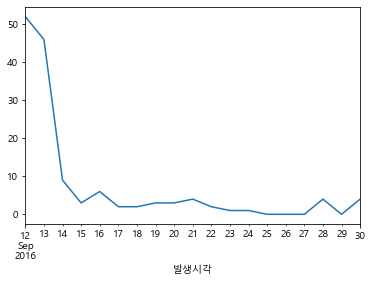

In [20]:
eq.loc['2016-09'].resample('D')['규모'].size().plot()
plt.show()

In [21]:
import folium
map=folium.Map(location=[36,127],zoom_start=6)
for n in range(len(eq.loc['2016-09'])): ##index가 번호로 되어있어서 그렇다.(= data[0].shape)
    folium.CircleMarker([eq.loc['2016-09']['위도'][n],eq.loc['2016-09']['경도'][n]],
                       radius=eq.loc['2016-09']['규모'][n],
                       color='#3186cc',fill_color='#3186cc',fill=True).add_to(map)
map